In [1]:
import numpy as np
import pygmt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
background_cat = pd.read_csv('./background_cat.csv')
cmt_small = pd.read_csv('./cmt_cat_small.csv')
cmt_large = pd.read_csv('./cmt_cat_large.csv')
cat = pd.read_csv('./cat.csv')
cat['time'] = pd.to_datetime(cat['time'])
cat = cat[cat.time > pd.to_datetime('2024-12-05T18:44:21')]
back_projection = pd.read_csv('./back_projection.csv')
pygmt.makecpt(cmap='hot', series=[0, 15, 0.1], continuous=True, output='back_projection.cpt')
kinematic_inv_stations = pd.read_csv('./kinematic_inv_stations.csv')


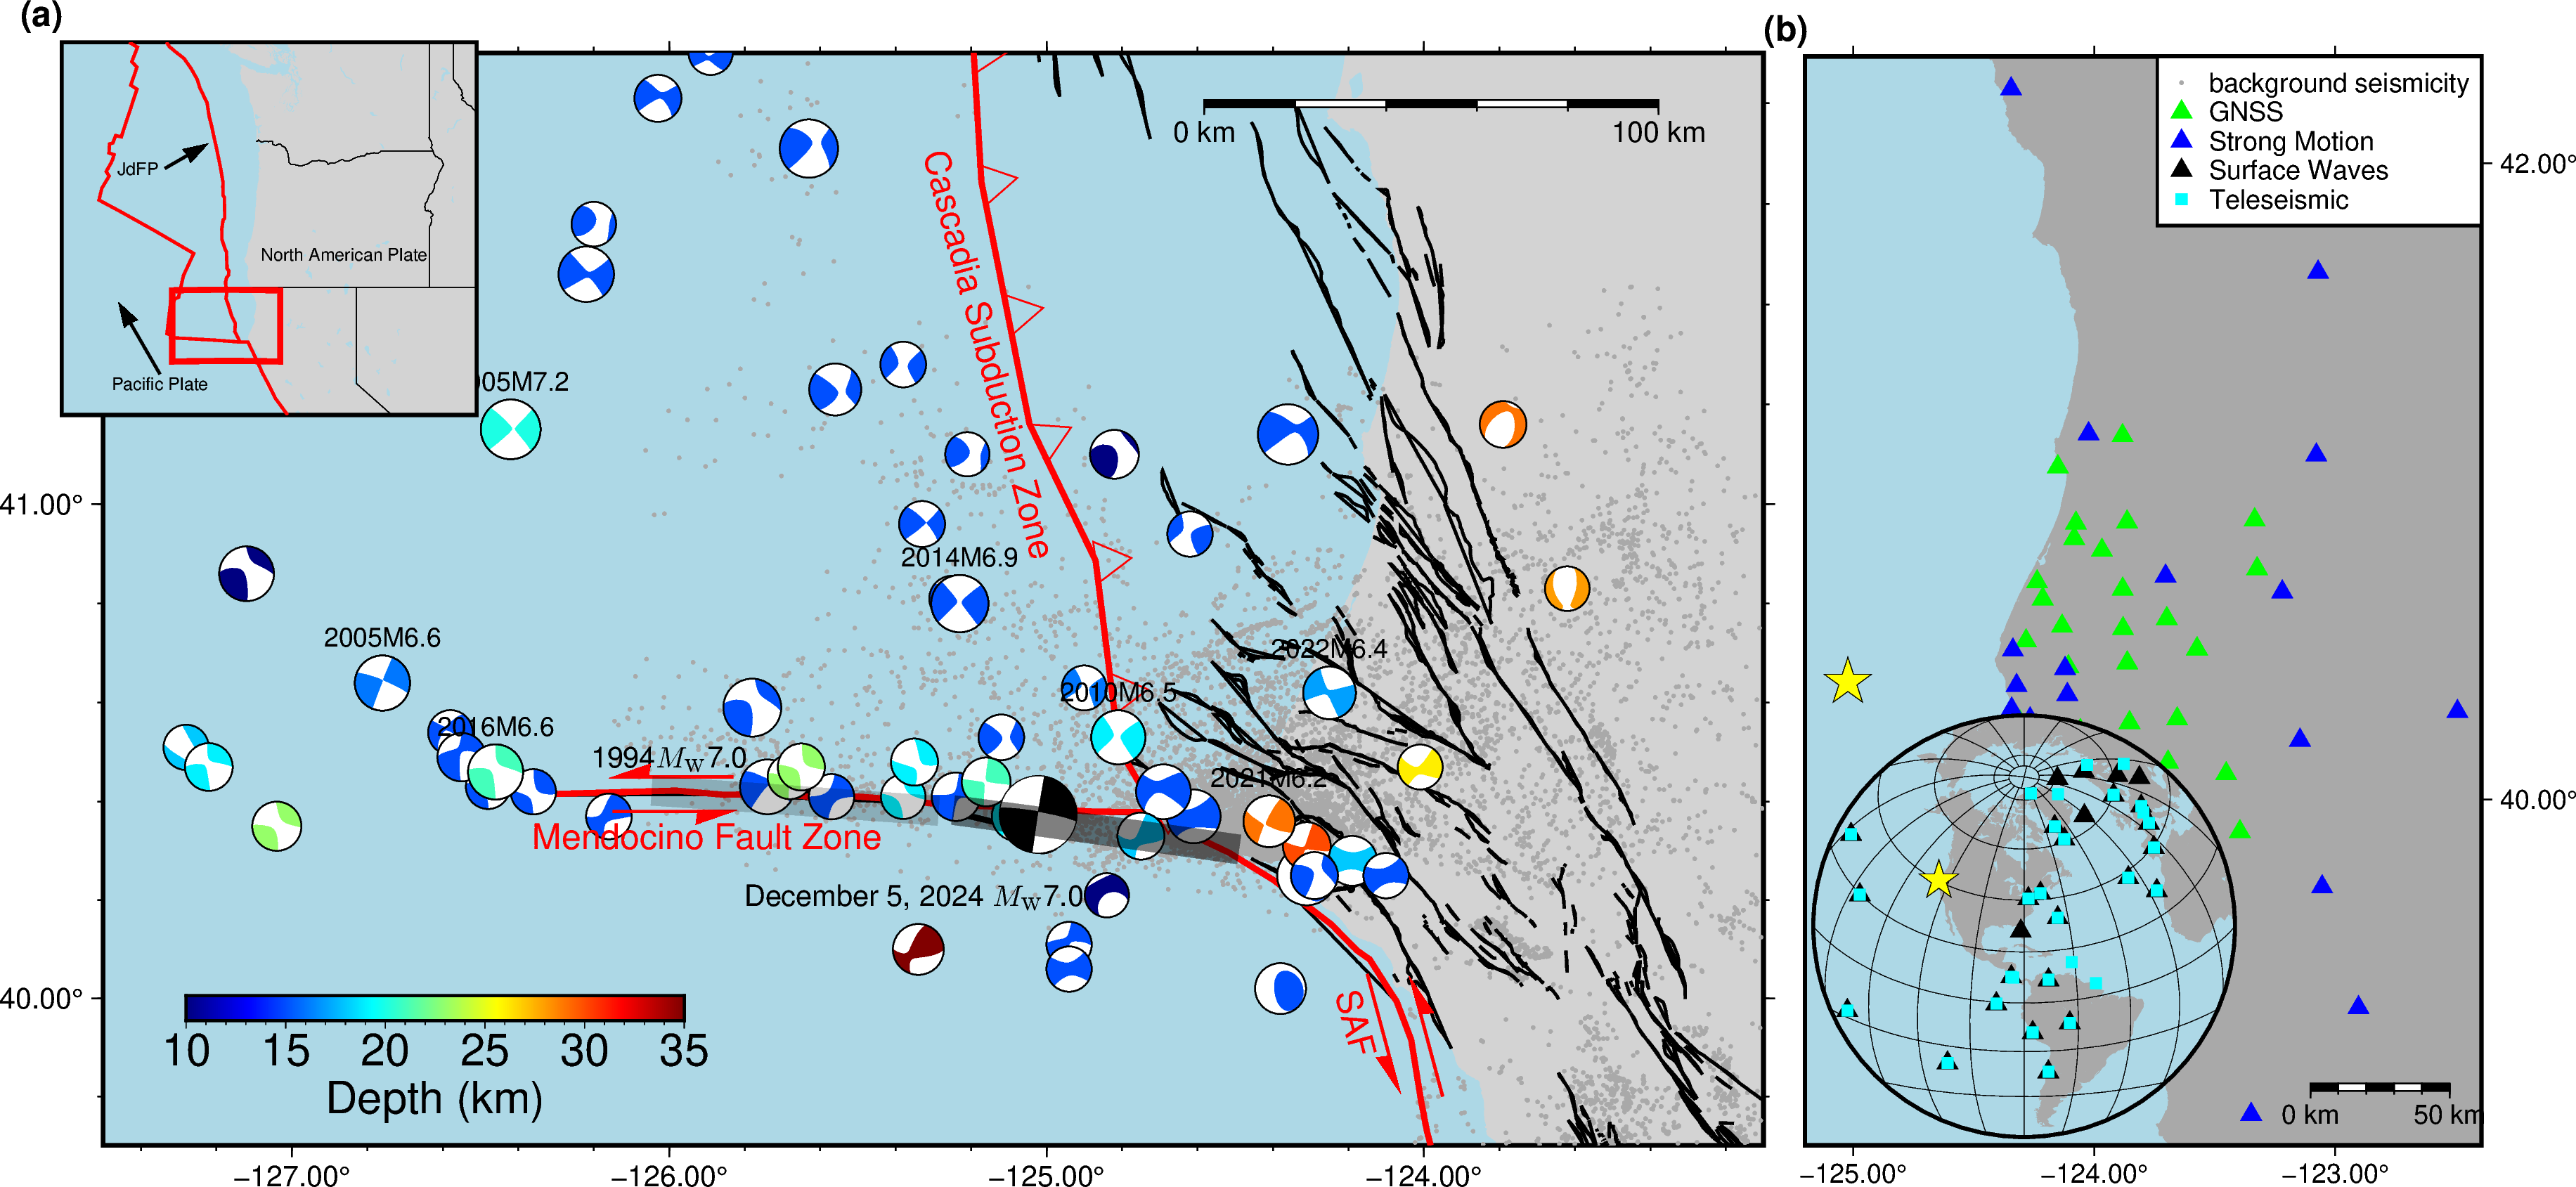

In [21]:

fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')
region1=[-127.5, -123.1, 39.7, 41.9]
fig.coast(
    frame=['WSne', 'xa1f0.2', 'ya1f0.2'],
    projection=f"M20",
    region=region1,
    land='lightgray',
    water='lightblue'
)
fig.plot(
    x=background_cat.lon,
    y=background_cat.lat,
    style="c0.05c",
    fill="darkgray",
    label='background seismicity'
)

fig.plot(data='./output.gmt', pen='1p,black', close=True)
fig.plot(data='./SAF_Men.gmt', pen='2p,red')
fig.plot(data='./cascedia.gmt', pen='2p,red', style='f1.5c/0.5c+r+t+p0.5p,red')

fig.meca(spec=cmt_small.iloc[:, 3:], longitude=cmt_small.lon, latitude=cmt_small.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_small.depth, cmap='cmt.cpt')
fig.meca(spec=cmt_large.iloc[:, 3:], longitude=cmt_large.lon, latitude=cmt_large.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_large.depth, cmap='cmt.cpt', event_name=cmt_large.name)
fig.text(x=-125.15, y=41.3, text='Cascadia Subduction Zone', font='12p,red', angle=-75)
fig.text(x=-124.18, y=39.95, text='SAF', font='12p,red', angle=-75)
fig.plot(x=-123.95, y=39.8, style="v0.5c+ea+r+h0.1+a35", direction=([105], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-124.15, y=40.05, style="v0.5c+ea+r+h0.1+a35", direction=([285], [1.5]), pen="1p,red", fill="red")
fig.text(x=-125.9, y=40.33, text='Mendocino Fault Zone', font='12p,red', angle=0)

focal_mechanism = [
    [280, 84, -179, 189, 89, -6, 4.028, 19]  # Single event
]

# Create a DataFrame to pass to pygmt.meca
focal_df = pd.DataFrame(focal_mechanism, columns=["strike1", "dip1", "rake1", "strike2", "dip2", "rake2", "mantissa", "exponent"])

# Event information (longitude, latitude, depth) and location for beachball
event_data = pd.DataFrame({
    "longitude": [-125.022],
    "latitude": [40.374],
    "depth": [10.0]
})

# Add the focal mechanism DataFrame to the event DataFrame
event_data = pd.concat([event_data, focal_df], axis=1)

# Plot the beachball using GCMT convention
fig.meca(spec=event_data, scale="2c", offset=True) 
fig.text(x=-126.0, y=40.57, text='1994@[M_{\\textrm{w}}@[7.0', font='10p', angle=0, offset='0/-0.5c')
fig.text(x=-125.35, y=40.374, text='December 5, 2024 @[M_{\\textrm{w}}@[7.0', font='10p', angle=0, offset='0/-1c')

fig.plot(x=-126.15, y=40.38, style="v0.5c+ea+r+h0.1+a35", direction=([0], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-125.83, y=40.45, style="v0.5c+ea+r+h0.1+a35", direction=([180], [1.5]), pen="1p,red", fill="red")

span_1994={'lon':[-126.046, -125.286], 'lat':[40.422, 40.381]}
span_2024={'lon':[-125.247, -124.490], 'lat':[40.383, 40.303]}

fig.plot(x=span_1994["lon"], y=span_1994["lat"], pen = "10p,black@80%")
fig.plot(x=span_2024["lon"], y=span_2024["lat"], pen = "10p,black@50%")

fig.basemap(map_scale="n0.8/0.95+w100k+f+u")

#Add the color bar for depth
with pygmt.config(FONT_LABEL='24p,Helvetica,black', FONT_ANNOT_PRIMARY='24p,Helvetica,black'):
    fig.colorbar(
        cmap='cmt.cpt',  # Use the same colormap as in the mec plot
        position="JBC+w6c/0.3c+o-6c/-1.8c+h",  # Position of the color bar
        frame='af+lDepth (km)'  # Label the color bar
    )
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
fig.shift_origin(yshift='8.8c', xshift='-0.5c')
region2=[-132, -115.1, 38, 49]
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')

fig.coast(
    frame=['lrtb'],
    projection=f"M5",
    region=region2,
    land='lightgray',
    water='lightblue',
    borders=2
)
fig.plot(data='./PB2002_boundaries.gmt', pen='1p,red')
fig.text(x=-128.0, y=39.0, text="Pacific Plate", font="6p", angle=0)
fig.plot(x=-128, y=39.3, style="v0.3c+ea+h0.1+a35", direction=([120], [1.0]), pen="1p", fill="black")
fig.text(x=-128.9, y=45.5, text="JdFP", font="6p", angle=0)
fig.plot(x=-127.8, y=45.5, style="v0.3c+ea+h0.1+a35", direction=([30], [0.6]), pen="1p", fill="black")
fig.text(x=-120.5, y=43.0, text="North American Plate", font="6p", angle=0)
fig.plot(x=[region1[0], region1[1], region1[1], region1[0]], y=[region1[2], region1[2], region1[3], region1[3]], pen="2p,red", close=True)
fig.text(position='TL', text='(a)', font='12p,Helvetica-Bold', offset='-0.5c/0.5c', no_clip=True)

# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
fig.shift_origin(yshift='-8.8c')



fig.shift_origin(xshift='21c')
t_stations = kinematic_inv_stations[kinematic_inv_stations.type.isin(['SM', 'GPS'])]

region = [-125.2, t_stations.lon.max()+0.1, t_stations.lat.min()-0.1, t_stations.lat.max()+0.1]
fig.coast(region=region, projection='M8.15c', frame=['lSnE', 'xa1.0', 'ya2'], land='darkgray', water='lightblue', area_thresh=10000)
fig.text(position='TL', text='(b)', font='12p,Helvetica-Bold', offset='-0.5c/0.5c', no_clip=True)

t_stations = kinematic_inv_stations[kinematic_inv_stations.type.isin(['GPS'])]
fig.plot(x=t_stations.lon, y=t_stations.lat, style='t0.3c', fill='green', label='GNSS')
t_stations = kinematic_inv_stations[kinematic_inv_stations.type.isin(['SM'])]
fig.plot(x=t_stations.lon, y=t_stations.lat, style='t0.3c', fill='blue', label='Strong Motion')
fig.plot(x=[10], y=[10], style='t0.3c', fill='black', label='Surface Waves')
fig.plot(x=[10], y=[10], style='s0.2c', fill='cyan', label='Teleseismic')



# Event information (longitude, latitude, depth) and location for beachball
event_data = pd.DataFrame({
    "longitude": [-125.022],
    "latitude": [40.374],
    "depth": [10.0]
})

fig.plot(x=event_data.longitude, y=event_data.latitude, style='a0.6c', fill='yellow', pen='0.2p,black')
fig.basemap(map_scale="n0.85/0.05+w50k+f+u")
fig.legend(position='n1/1+jTR', box='+gwhite+p1p')


fig.shift_origin(xshift='0.1c', yshift='0.1c')
fig.coast(region='g', projection='A280/30/2i', frame=['xg20', 'yg20'], land='darkgray', water='lightblue', area_thresh=10000)
t_stations = kinematic_inv_stations[kinematic_inv_stations.type.isin(['surf'])]
fig.plot(x=t_stations.lon, y=t_stations.lat, style='t0.3c', fill='black')
t_stations = kinematic_inv_stations[kinematic_inv_stations.type.isin(['body'])]
fig.plot(x=t_stations.lon, y=t_stations.lat, style='s0.2c', fill='cyan')
fig.plot(x=event_data.longitude, y=event_data.latitude, style='a0.5c', fill='yellow', pen='0.2p,black')

fig.show(width=1200)